<a href="https://colab.research.google.com/github/tuananh1006/Torch_Practice/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()
X=iris.data
y=iris.target

In [17]:
from collections import Counter
Counter(y)

Counter({0: 50, 1: 50, 2: 50})

In [5]:
X.shape

(150, 4)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
X_train.shape

(120, 4)

In [26]:
X_train_torch=torch.tensor(X_train,dtype=torch.float32)
y_train_torch=torch.tensor(y_train,dtype=torch.long)
X_test_torch=torch.tensor(X_test,dtype=torch.float32)
y_test_torch=torch.tensor(y_test,dtype=torch.long)

In [27]:
from torch.utils.data import Dataset,DataLoader

In [77]:
class IrisDataset(Dataset):
  def __init__(self,X,y):
    super().__init__()
    self.X=X
    self.y=y
  def __len__(self):
    return len(self.X)
  def __getitem__(self,idx):
    return self.X[idx],self.y[idx]

In [170]:
train_loader=DataLoader(IrisDataset(X_train_torch,y_train_torch),batch_size=4,shuffle=True)
test_loader=DataLoader(IrisDataset(X_test_torch,y_test_torch),batch_size=10,shuffle=False)

In [171]:
class IrisModel(nn.Module):
  def __init__(self,input_dim,output_dim):
    super().__init__()
    self.fc1=nn.Linear(input_dim,50)
    self.fc2=nn.Linear(50,output_dim)
    self.relu=nn.ReLU()
    self.log_softmax=nn.LogSoftmax(dim=1)
  def forward(self,x):
    x=self.fc1(x)
    x=self.relu(x)
    x=self.fc2(x)
    x=self.log_softmax(x)
    return x

In [172]:
model=IrisModel(4,3)
loss=nn.CrossEntropyLoss()
optim=torch.optim.Adam(model.parameters(),lr=0.05)
epochs=100

In [173]:
train_loss=[]
for epoch in range(1,epochs+1):
  losses=0
  for i,(X,y) in enumerate(train_loader):
    predict=model(X)
    los=loss(predict,y)
    los.backward()
    optim.step()
    optim.zero_grad()
    losses+=los.item()
  train_loss.append(los.item())
  if epoch%10==0:
    print(f"Epoch {epoch}/{epochs} Loss: {los}")

Epoch 10/100 Loss: 0.0056885769590735435
Epoch 20/100 Loss: 0.0016893433639779687
Epoch 30/100 Loss: 0.040577709674835205
Epoch 40/100 Loss: 0.18554730713367462
Epoch 50/100 Loss: 0.5311602354049683
Epoch 60/100 Loss: 0.34225061535835266
Epoch 70/100 Loss: 0.0026143421418964863
Epoch 80/100 Loss: 2.568842683103867e-05
Epoch 90/100 Loss: 0.3235163390636444
Epoch 100/100 Loss: 0.005841419566422701


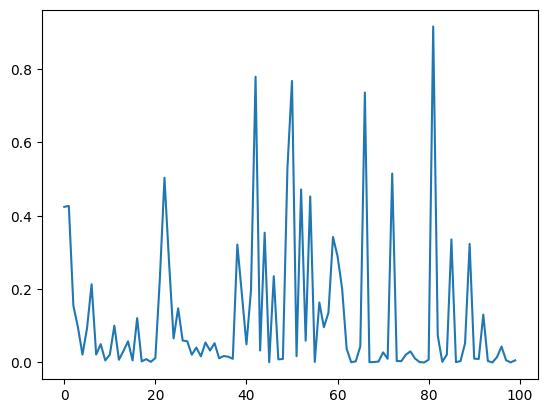

In [174]:
import matplotlib.pyplot as plt
plt.plot(range(epochs),train_loss)
plt.show()

In [175]:
y.unique()

tensor([0, 1])

In [176]:
correct=0
total=0
with torch.no_grad():
  for X,y in test_loader:
    predict=model(X)
    _,predict=torch.max(predict,1)
    total+=y.size(0)
    correct+=(predict==y).sum().item()


In [177]:
correct

30

In [178]:
total

30

In [179]:
correct/total

1.0

In [180]:
from collections import Counter
Counter(y_test)[0]/len(y_test)

0.3333333333333333

In [181]:
Counter(y_test)[1]/len(y_test)

0.3

In [182]:
Counter(y_test)[2]/len(y_test)

0.36666666666666664

In [184]:
most_common_cnt=Counter(y_test).most_common()[0][1]

In [186]:
most_common_cnt

11